In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('https://filteredexternaldata.s3.us-east-2.amazonaws.com/default.csv')
data.sample(5)

,Defaulter,Monthly_Income,Total_outstanding_loans
2088,YES,2890.0,55986.999512
1189,YES,4300.0,38784.000397
2186,YES,3470.0,89236.000061
2475,YES,3690.0,70193.000793
2065,YES,2970.0,-38363.998413


# EDA 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Defaulter                3020 non-null   object 
 1   Monthly_Income           3020 non-null   float64
 2   Total_outstanding_loans  3020 non-null   float64
dtypes: float64(2), object(1)
memory usage: 70.9+ KB


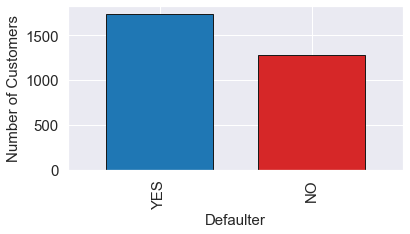

In [4]:
data['Defaulter'].value_counts().plot.bar(color=['tab:blue', 'tab:red'], 
                                         fontsize=15, width=0.7, 
                                         figsize=(6, 3), edgecolor='k')
plt.xlabel('Defaulter', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.show()

In [5]:
data.describe()

,Monthly_Income,Total_outstanding_loans
count,3020.000000,3020.000000
mean,3343.069536,51668.137430
std,1107.387019,38478.674635
min,-4650.000000,-239531.005859
25%,2800.000000,35958.999634
50%,3700.000000,63238.500595
75%,4180.000000,78882.750034
max,4490.000000,99613.000005


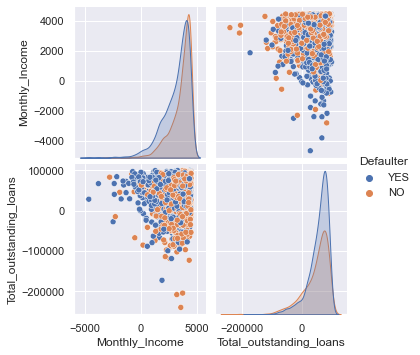

In [6]:
sns.pairplot(data, hue='Defaulter')
plt.show()

In [7]:
data.corr()

,Monthly_Income,Total_outstanding_loans
Monthly_Income,1.000000,0.178058
Total_outstanding_loans,0.178058,1.000000


# Model 

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [9]:
X = data.drop('Defaulter', axis=1)
y = data['Defaulter']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [15]:
model_lr = make_pipeline(StandardScaler(), 
                         LogisticRegression(class_weight='balanced'))

model_lr.fit(X_train, y_train)
print(f'Model Score: {model_lr.score(X_test, y_test)}')

y_pred = model_lr.predict(X_test)
print(f'\nConfusion Matrix: \n {confusion_matrix(y_test, y_pred)}')

Model Score: 0.6142384105960265

Confusion Matrix: 
 [[185  79]
 [154 186]]


In [16]:
model_ridge = make_pipeline(StandardScaler(), 
                         RidgeClassifier(class_weight='balanced'))

param_grid = {'ridgeclassifier__alpha': 
              [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 100]}

grid_ridge = GridSearchCV(model_ridge, 
                         param_grid=param_grid, 
                         cv=5)

grid_ridge.fit(X_train, y_train)
print(f'Model Score: {grid_ridge.score(X_test, y_test)}')

y_pred = model_lr.predict(X_test)
print(f'\nConfusion Matrix: \n {confusion_matrix(y_test, y_pred)}')

Model Score: 0.6175496688741722

Confusion Matrix: 
 [[185  79]
 [154 186]]


In [17]:
model_rf = RandomForestClassifier(class_weight='balanced')

model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.5662251655629139